In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import imdb
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers, losses, metrics

2022-06-28 15:29:19.053136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 15:29:19.053169: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
def vectorize_sequences(sequences, dimension=2000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 2000)

In [15]:
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max_word_index = max([max(sequence) for sequence in train_data])
min_word_index = min([min(sequence) for sequence in train_data])
max_len_seq = max([len(sequence) for sequence in train_data])
min_len_seq = min([len(sequence) for sequence in train_data])
print(f'Maximum word index: {max_word_index}')
print(f'Minimum word index: {min_word_index}')
print(f'Maximum seq length: {max_len_seq}')
print(f'Minimum seq length: {min_len_seq}')

<class 'list'>
Maximum word index: 1999
Minimum word index: 1
Maximum seq length: 2494
Minimum seq length: 11


In [16]:
word_index = imdb.get_word_index()

ind = 33

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[ind]])

print(f'REVIEW:\n {decoded_review}\n')
print(f'Encoded sequence of words:\n {train_data[ind]}\n')
print(f'Label: {train_labels[ind]}\n')

REVIEW:
 ? i don't know what it is i find so ? about this film but the first time i saw it i wanted to see how it ended i'm not a big fan of paul ? nor of war ? but i was truly wondering just how and when ? would find his child all he knows is that the boy has green eyes truth be told i have not seen this movie in years nor has it been shown on tv in a while but this movie is somewhat of one man's ? after the ? of war ? shows a very ? and heart ? portrayal of a man lost by his memories there is an ? message in this movie that he is looking for the last ? of human ? in the ? of this war and the reality that he does ? why this movie is not yet on dvd or video is a mystery to me

Encoded sequence of words:
 [1, 13, 92, 124, 51, 12, 9, 13, 169, 38, 2, 44, 14, 22, 21, 4, 86, 58, 13, 219, 12, 13, 473, 8, 67, 89, 12, 1054, 146, 24, 6, 194, 337, 7, 723, 2, 885, 7, 325, 2, 21, 13, 16, 371, 1535, 43, 89, 5, 54, 2, 62, 169, 27, 506, 32, 29, 694, 9, 15, 4, 430, 47, 1419, 523, 882, 30, 579, 13, 28,

In [20]:
# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [22]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [24]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-06-27 17:33:46.932930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-27 17:33:46.951639: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-27 17:33:46.996675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (maia-Latitude-E5450): /proc/driver/nvidia/version does not exist
2022-06-27 17:33:47.625095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [27]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=128,
                   validation_data=(X_val, y_val))

2022-06-27 17:34:59.983898: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
116/118 [============================>.] - ETA: 0s - loss: 0.4097 - binary_accuracy: 0.8372

2022-06-27 17:36:31.483955: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


118/118 [==============================] - 143s 1s/step - loss: 0.4080 - binary_accuracy: 0.8380 - val_loss: 0.3461 - val_binary_accuracy: 0.8563
Epoch 2/20
118/118 [==============================] - 2s 9ms/step - loss: 0.2163 - binary_accuracy: 0.9201 - val_loss: 0.2741 - val_binary_accuracy: 0.8917
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1570 - binary_accuracy: 0.9434 - val_loss: 0.2991 - val_binary_accuracy: 0.8872
Epoch 4/20
118/118 [==============================] - 1s 10ms/step - loss: 0.1211 - binary_accuracy: 0.9563 - val_loss: 0.3558 - val_binary_accuracy: 0.8706
Epoch 5/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0949 - binary_accuracy: 0.9654 - val_loss: 0.3614 - val_binary_accuracy: 0.8781
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0709 - binary_accuracy: 0.9766 - val_loss: 0.4192 - val_binary_accuracy: 0.8725
Epoch 7/20
118/118 [==============================] - 1s 10ms/step - los

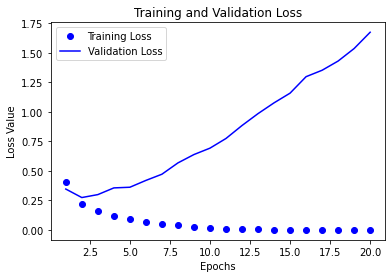

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

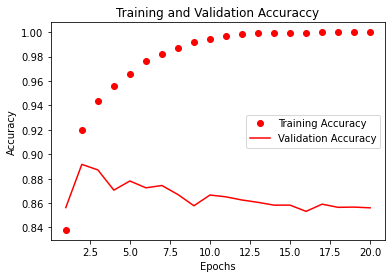

In [31]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()